In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("df_total_vinculo.csv")

In [3]:
df.shape

(17409812, 23)

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

faixa_remuneracao_media_sm  sexo_cod  viculo_empregaticio_Aprendiz  \
0                           0         0                             0   
1                           0         0                             0   
2                           0         0                             0   
3                           0         0                             0   
4                           0         0                             0   

   viculo_empregaticio_Avulso  viculo_empregaticio_CLT R/ PF Determinado  \
0                           0                                          0   
1                           0                                          0   
2                           0                                          0   
3                           0                                          0   
4                           0                                          0   

   viculo_empregaticio_CLT R/ PF Ind  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   viculo_empregaticio_CLT R/ PJ Determinado  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   viculo_empregaticio_CLT R/ PJ Ind  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   viculo_empregaticio_CLT U/ PF Determinado  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   viculo_empregaticio_CLT U/ PF Ind  ...  \
0                                  0  ...   
1                                  0  ...   
2                                  0  ...   
3                                  0  ...   
4                                  0  ...   

   viculo_empregaticio_Contrat Lei Estadual  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   viculo_empregaticio_Contrat Lei Municipal  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   viculo_empregaticio_Contrat Prazo Determinado  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   viculo_empregaticio_Contrat TMP Determinado  viculo_empregaticio_Diretor  \
0                                            0                            0   
1                                            0                            0   
2                                            0                            0   
3                                            0                            0   
4                                            0                            0   

   viculo_empregaticio_Estatutário  viculo_empregaticio_Estatutário RGPS  \
0                                0                                     0   
1                                0                                     0   
2                                0                                     0   
3                                0                                     0   
4                                0  

In [4]:
df_menor = df[df["faixa_remuneracao_media_sm"]==0]

df_0 = df[df["faixa_remuneracao_media_sm"].isin([1, 2, 3])]
df_1 = df[df["faixa_remuneracao_media_sm"].isin([8, 9, 10])]

df_maior = df[df["faixa_remuneracao_media_sm"]==11]


In [5]:
df_logistica =  df[df["faixa_remuneracao_media_sm"].isin([0,11])]
df_logistica['faixa_remuneracao_media_sm'] = df_logistica['faixa_remuneracao_media_sm'].replace({0: 0, 11: 1})


/var/folders/7z/98kf6nzs505d1y91nml4ff2wzx529r/T/ipykernel_72756/1279625075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistica['faixa_remuneracao_media_sm'] = df_logistica['faixa_remuneracao_media_sm'].replace({0: 0, 11: 1})


In [8]:
df_logistica.columns

Index(['faixa_remuneracao_media_sm', 'sexo_cod',
       'viculo_empregaticio_Aprendiz', 'viculo_empregaticio_Avulso',
       'viculo_empregaticio_CLT R/ PF Determinado',
       'viculo_empregaticio_CLT R/ PF Ind',
       'viculo_empregaticio_CLT R/ PJ Determinado',
       'viculo_empregaticio_CLT R/ PJ Ind',
       'viculo_empregaticio_CLT U/ PF Determinado',
       'viculo_empregaticio_CLT U/ PF Ind',
       'viculo_empregaticio_CLT U/ PJ Determinado',
       'viculo_empregaticio_CLT U/ PJ Ind',
       'viculo_empregaticio_Contrat Lei Estadual',
       'viculo_empregaticio_Contrat Lei Municipal',
       'viculo_empregaticio_Contrat Prazo Determinado',
       'viculo_empregaticio_Contrat TMP Determinado',
       'viculo_empregaticio_Diretor', 'viculo_empregaticio_Estatutário',
       'viculo_empregaticio_Estatutário RGPS',
       'viculo_empregaticio_Estatutário não Efetivo',
       'viculo_empregaticio_Temporário', 'random_faixa'],
      dtype='object')

In [ ]:
to refazendo a analises para outras bases, vou te enviando o resultado e vc monta um textinho explicativo para o resultado?

aqui eu rodei assim: 

In [17]:
#nao ta rodando a logistica pode ser multicolineriaridade entao eu vou rodar um modelo para selecionar as variaveis mais importantes


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preparando os dados
X = df_logistica.drop(['faixa_remuneracao_media_sm'], axis=1)
y = df_logistica['faixa_remuneracao_media_sm']

# É importante padronizar as características para regressão Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ajustando o modelo Lasso
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

# Coeficientes do modelo
coef = pd.DataFrame(zip(X.columns, lasso_model.coef_[0]), columns=['Feature', 'Coefficient'])
print(coef[coef['Coefficient'] != 0])  # Mostrar apenas características com coeficientes não-zero


                                 Feature  Coefficient
0                               sexo_cod     0.190820
1           viculo_empregaticio_Aprendiz   -24.578420
2             viculo_empregaticio_Avulso    -0.027927
10     viculo_empregaticio_CLT U/ PJ Ind     0.132418
16       viculo_empregaticio_Estatutário     0.426144
17  viculo_empregaticio_Estatutário RGPS    -0.022112
20                          random_faixa    15.112871


In [21]:
import statsmodels.api as sm

X = df_logistica[['sexo_cod',
        'viculo_empregaticio_Avulso',"viculo_empregaticio_CLT U/ PJ Ind",
        "viculo_empregaticio_Estatutário",
        "viculo_empregaticio_Estatutário RGPS"]] 
X = sm.add_constant(X)  
y = df_logistica['faixa_remuneracao_media_sm']

# Criando o modelo de regressão logística
model = sm.Logit(y, X)

# Ajustando o modelo
result = model.fit()

# Mostrando os resultados
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.294750
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     faixa_remuneracao_media_sm   No. Observations:               481474
Model:                                  Logit   Df Residuals:                   481468
Method:                                   MLE   Df Model:                            5
Date:                        Sun, 12 May 2024   Pseudo R-squ.:                  0.3707
Time:                                15:27:18   Log-Likelihood:            -1.4191e+05
converged:                               True   LL-Null:                   -2.2551e+05
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Análise dos Resultados
Convergência: O modelo alcançou a convergência (converged: True), o que indica que o algoritmo de otimização encontrou uma solução estável e provavelmente ótima para os coeficientes do modelo.
Coeficientes e Significância Estatística:
const: O intercepto tem um coeficiente muito negativo (-2.4617), o que afeta a linha de base das log-odds para a variável dependente quando todas as outras variáveis são zero.
sexo_cod: Continua com um coeficiente positivo significativo (1.2619) e altamente significativo (p < 0.000), indicando que mudanças em sexo_cod têm um impacto substancial na probabilidade de estar na faixa de remuneração mais alta.
viculo_empregaticio_Avulso: Apresenta um coeficiente negativo (-0.4357), sugerindo uma associação negativa com estar na faixa de remuneração mais alta. O p-value é menor que 0.000, indicando significância estatística.
viculo_empregaticio_CLT U/ PJ Ind e viculo_empregaticio_Estatutário: Ambos têm coeficientes muito altos e positivos (3.4078 e 5.1075, respectivamente), significando que estes vínculos estão fortemente associados a uma maior probabilidade de estar na faixa salarial mais alta.
viculo_empregaticio_Estatutário RGPS: Também tem um impacto positivo na previsão da faixa salarial mais alta (coeficiente de 1.2197), com significância estatística.
Fit do Modelo:
Pseudo R-squared (0.3707): Um aumento considerável em relação ao valor anterior, sugerindo que o modelo ajustado explica uma proporção razoável da variabilidade na variável dependente.
Log-Likelihood e LLR p-value: O log-likelihood melhorou bastante, e o teste LLR (log-likelihood ratio) tem um p-value de 0.000, indicando que o modelo como um todo é estatisticamente significativo em comparação com o modelo nulo.

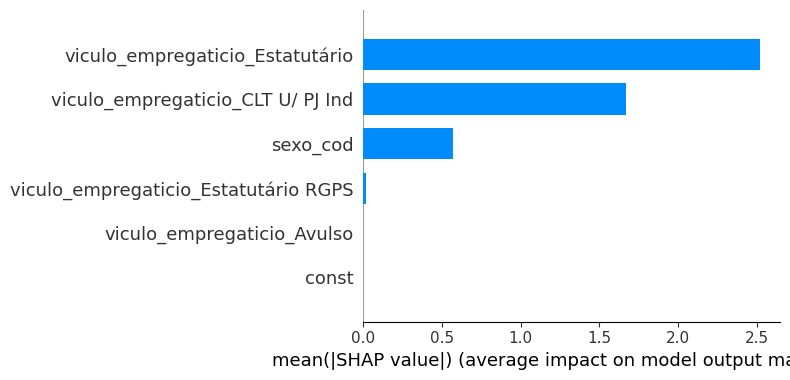

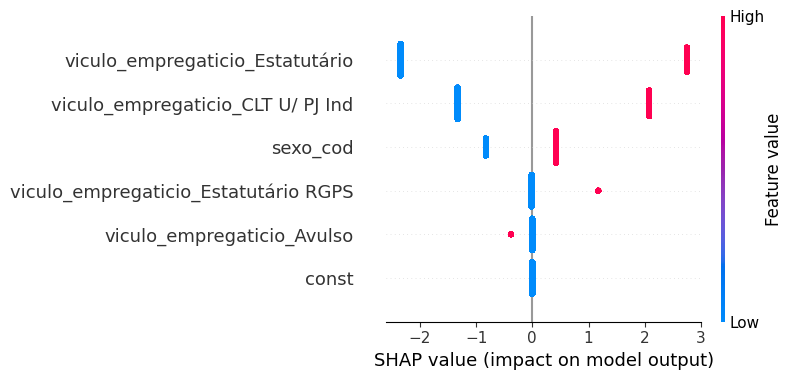

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Supondo que df_logistica é seu DataFrame e X e y já estão definidos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação do modelo de regressão logística
model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train, y_train)

# Usando SHAP
import shap

explainer = shap.Explainer(model_sklearn, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


Agora vou rodar a logistica deixando como variavel y o sexo cod e colocando todas as outras como dependentes para ver qual explica melhor

LinearExplainer explainer: 5222945it [00:28, 104283.48it/s]                             


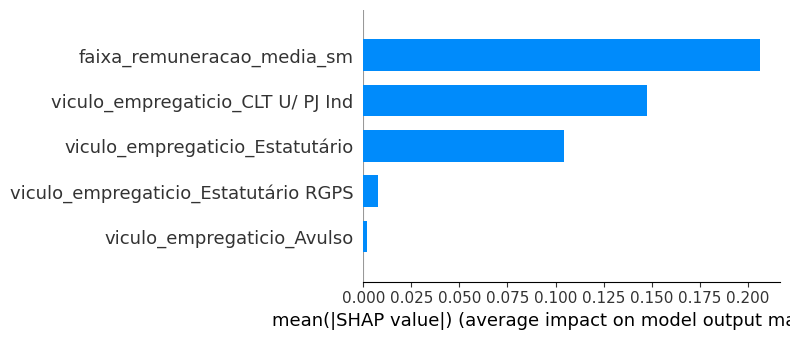

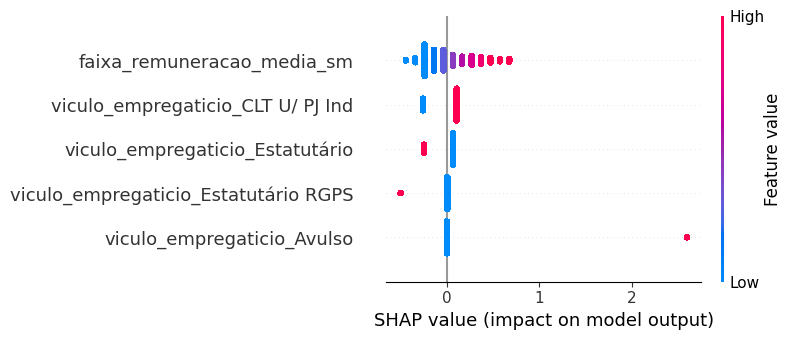

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['faixa_remuneracao_media_sm', 'viculo_empregaticio_Avulso',"viculo_empregaticio_CLT U/ PJ Ind",
        "viculo_empregaticio_Estatutário","viculo_empregaticio_Estatutário RGPS"]]  
y= df['sexo_cod']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train, y_train)

# Usando SHAP
import shap

explainer = shap.Explainer(model_sklearn, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [7]:
import statsmodels.api as sm

X = df_logistica[['faixa_remuneracao_media_sm',
        'viculo_empregaticio_Avulso',"viculo_empregaticio_CLT U/ PJ Ind",
        "viculo_empregaticio_Estatutário",
        "viculo_empregaticio_Estatutário RGPS"]] 
X = sm.add_constant(X)  
y = df_logistica['sexo_cod']

# Criando o modelo de regressão logística
model = sm.Logit(y, X)

# Ajustando o modelo
result = model.fit()

# Mostrando os resultados
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.622413
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               sexo_cod   No. Observations:               481474
Model:                          Logit   Df Residuals:                   481468
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 May 2024   Pseudo R-squ.:                 0.03913
Time:                        22:09:31   Log-Likelihood:            -2.9968e+05
converged:                       True   LL-Null:                   -3.1188e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.0619      0.0